## Creating Visualization from a Shapefile

### Import Modules

In [1]:
# For plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from descartes import PolygonPatch
import seaborn

# Dealing with shapefiles
from shapely.geometry import MultiPolygon, shape
from fiona import collection
import fiona

import random

# Timestamping
import datetime

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
seaborn.set()

### Import Shapefile and manipulate

In [3]:
shapepath = '../ss/data/LGA_ABS_16/LGA_2016_AUST.shp'

In [4]:
# Create multipolygon obect, this will be used to find master bounds for victoria and set axis limits

multipolygon = MultiPolygon([
    shape(p['geometry']).simplify(tolerance=0.05)
    for p in fiona.open(shapepath) if p['geometry'] is not None
    and p['properties']['STE_NAME16'] == 'Victoria'
])

### Set Colour Dictionary

In [5]:
cols5band = {'BrBg':['#a6611a','#dfc27d','#f5f5f5','#80cdc1','#018571'],
       'PiYG':['#d01c8b','#f1b6da','#f7f7f7','#b8e186','#4dac26'],
       'PRGn':['#7b3294','#c2a5cf','#f7f7f7','#a6dba0','#008837'],
       'PuOr':['#7b3294','#c2a5cf','#f7f7f7','#a6dba0','#008837'],
       'RdBu':['#ca0020','#f4a582','#f7f7f7','#92c5de','#0571b0'],
       'RdGy':['#ca0020','#f4a582','#ffffff','#bababa','#404040'],
       'RdYlBu':['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6'],
       'RdYlGn':['#d7191c','#fdae61','#ffffbf','#a6d96a','#1a9641'],
        'Spectral':['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba'],
        'PuRd':['#f1eef6','#d7b5d8','#df65b0','#dd1c77','#980043'],
        'RdPu':['#feebe2','#fbb4b9','#f768a1','#c51b8a','#7a0177'],
        'YlGn':['#ffffcc','#c2e699','#78c679','#31a354','#006837'],
        'YlGnBu':['#ffffcc','#a1dab4','#41b6c4','#2c7fb8','#253494'],
        'YlOrRd':['#ffffb2','#fecc5c','#fd8d3c','#f03b20','#bd0026']}

In [6]:
# Set the colour key
key = 'BrBg'

### Generate, plot and save

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Heltevitica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


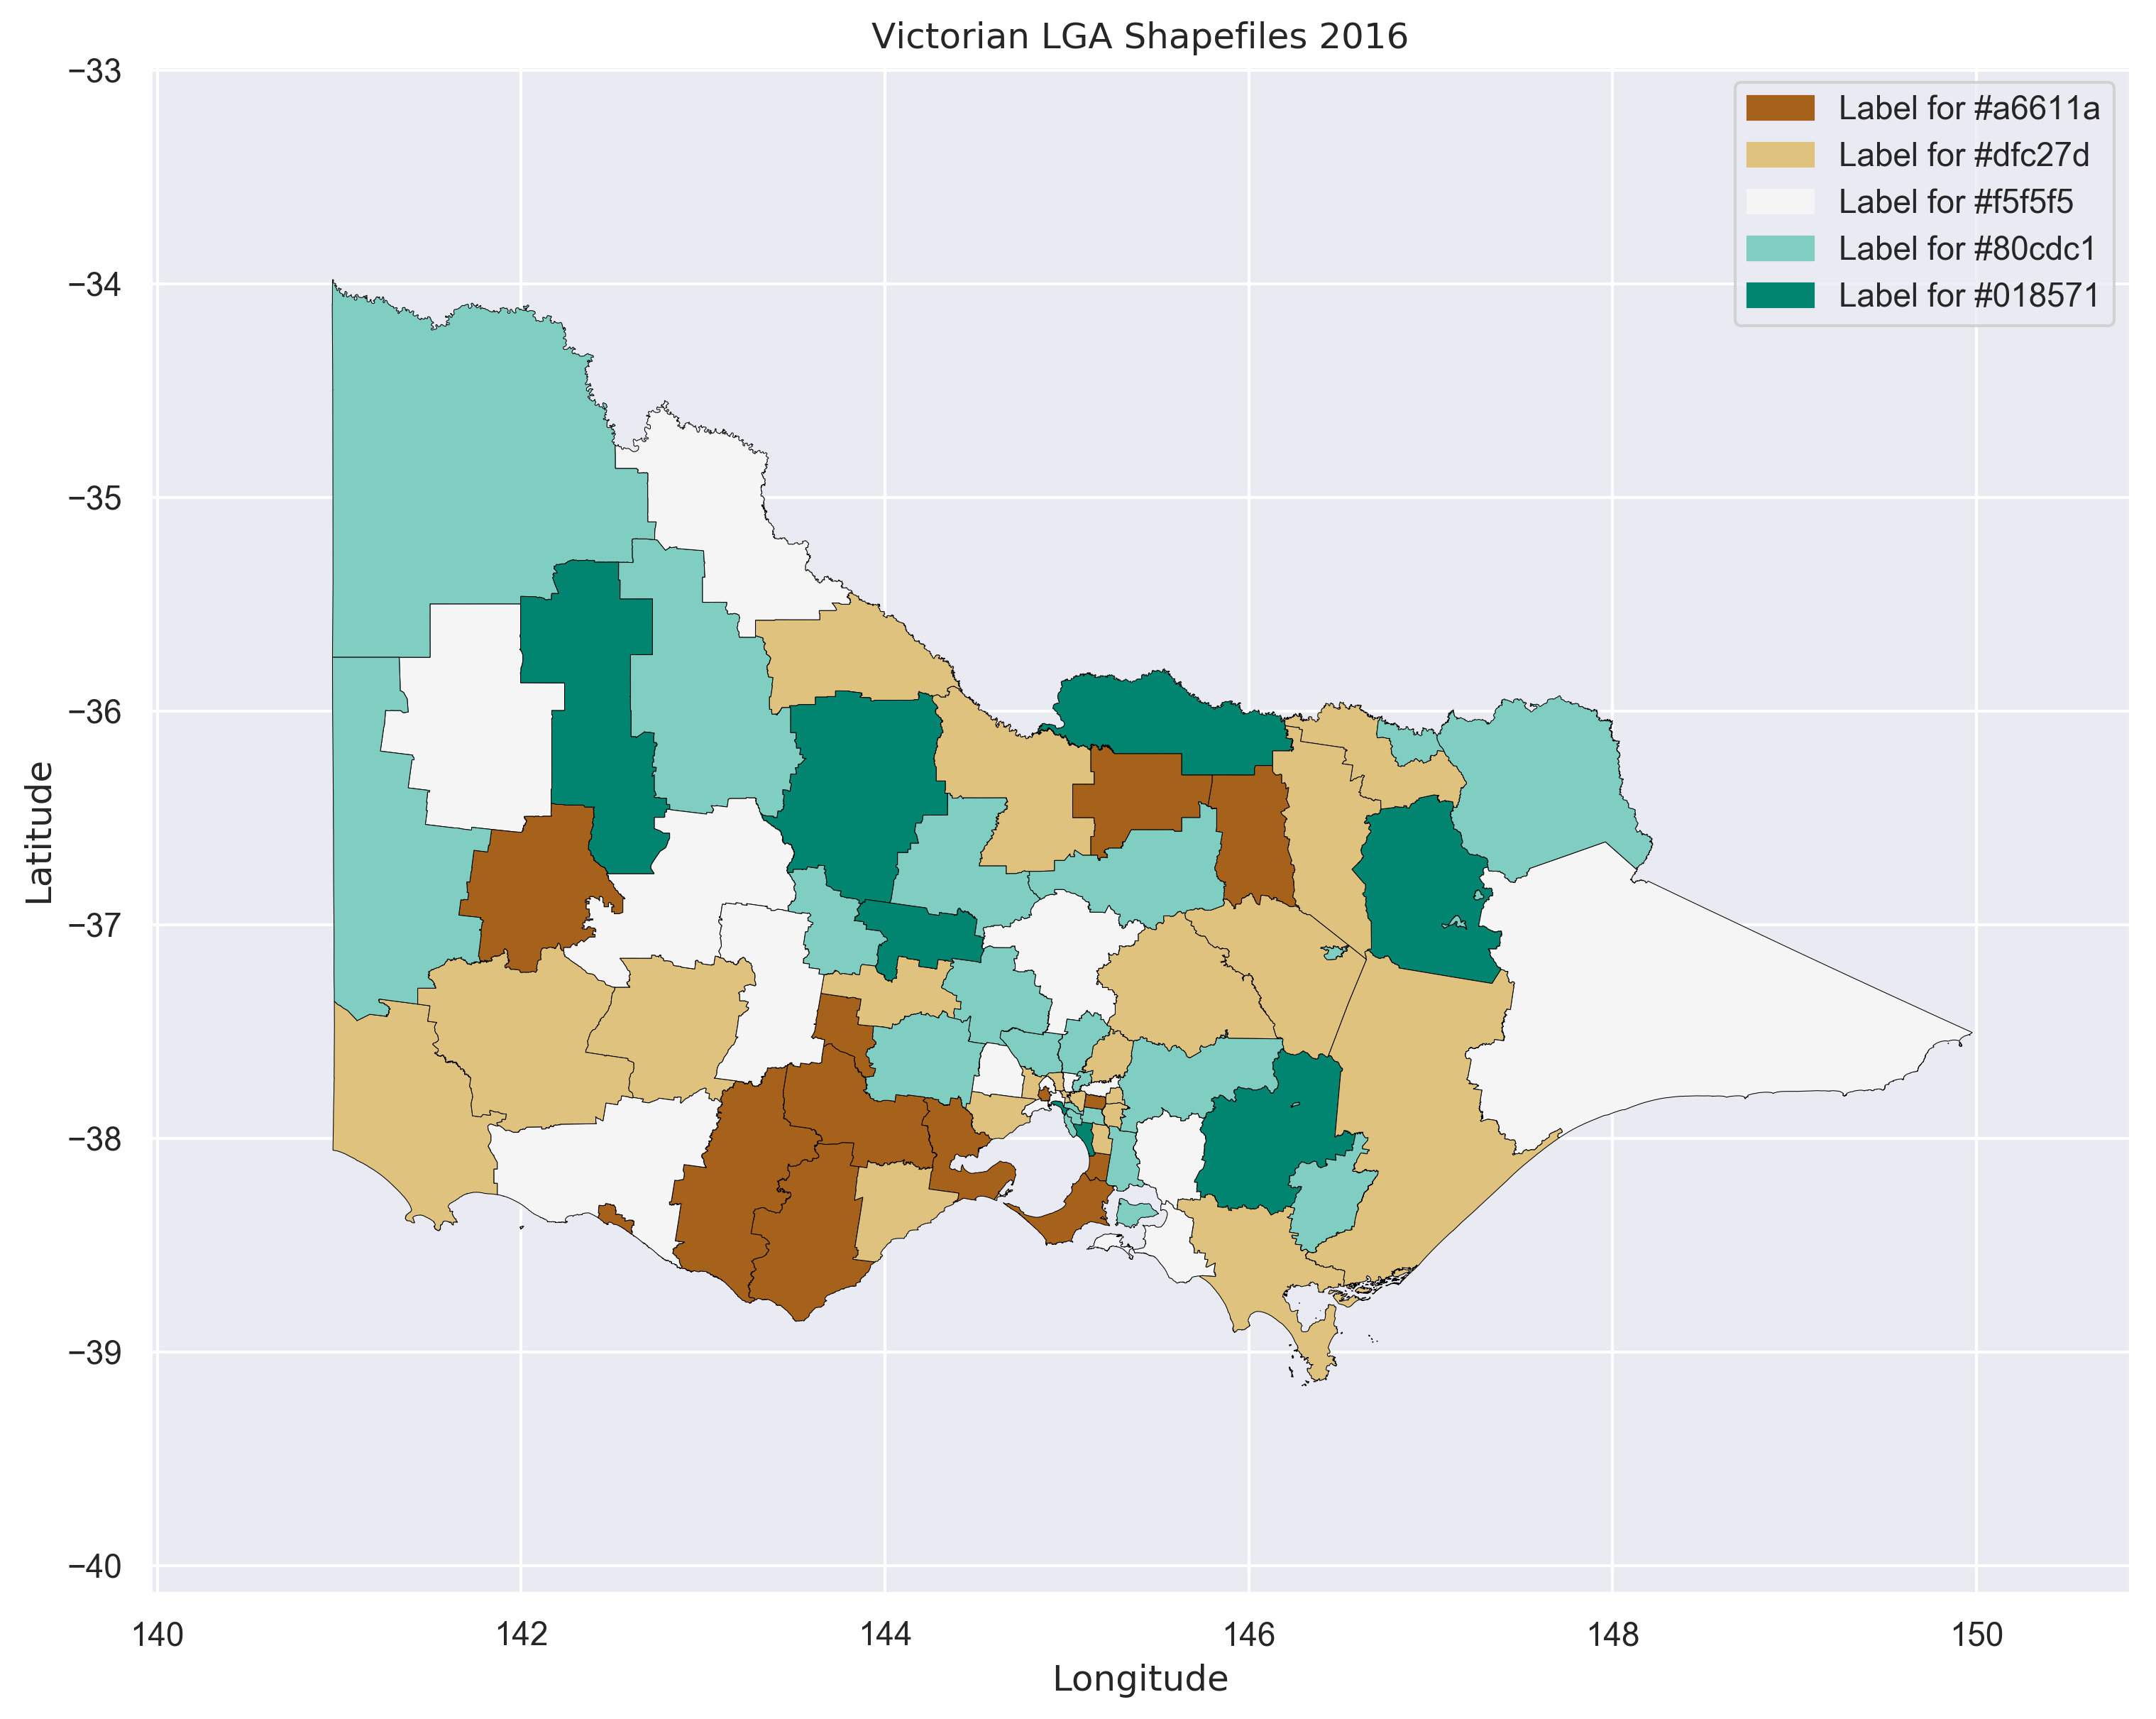

In [7]:
# Create figure 

fig = plt.figure(1, figsize=(12, 9.5), dpi=300)
ax = fig.add_subplot(111)

colours = cols5band[key]

# Iterate through each polygon in collection
with collection(shapepath, "r") as input:
    for pol in input:
        if pol['geometry'] is not None and pol['properties']['STE_NAME16'] == 'Victoria':
            ax.add_patch(
                PolygonPatch(pol['geometry'], 
                 fc= colours[random.randint(0,len(colours)-1)], # Assign each polygon a random colour from colours
                 ec='black', 
                 linewidth = .25, 
                 alpha=1 ))

# Dynamically set x/y axis limits
xMin, yMin, xMax, yMax  = multipolygon.bounds
offset = 1
ax.set_xlim(xMin + -offset, xMax + offset)
ax.set_ylim(yMin - offset, yMax + offset)

# Set fonts (optional)
font = {'fontname':'Heltevitica'}
ax.set_xlabel('Longitude', **font)
ax.set_ylabel('Latitude', **font)
ax.set_title('Victorian LGA Shapefiles 2016', **font)

# Create Legend (optional)
handles = [mpatches.Patch(color = colour, label = 'Label for {}'.format(colour)) for colour in colours]
plt.legend(handles=handles)


# Export to .svg or .png (.svg has greater scaling but larger file size)
# Create timestamp
ts = datetime.datetime.now().strftime('%y%m%d%H%M%S')

# Implant timestamp and key to filename
fig.savefig('../ss/data/LGA_VIC16_{}_{}.svg'.format(key,ts))